In [ ]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import linearcorex
from metric_utils import calculate_nll_score

In [124]:
from generate_data import generate_nglf_from_model
from generate_data import generate_general_make_spd

##### generate nglf data

In [125]:
m = 8
bs = 16
nv = m * bs
train_cnt = 8
test_cnt = 100
(data, ground_truth) = generate_nglf_from_model(nv=nv, m=m, nt=1, ns=train_cnt + test_cnt, snr=5.0)
data = data[0]
train_data = data[:train_cnt]
test_data = data[train_cnt:]

Fixed SNR: 5.0


##### generate general data

In [4]:
m = 8
bs = 16
nv = m * bs
train_cnt = 8
test_cnt = 100
(data, ground_truth) = generate_general_make_spd(nv=nv, m=m, nt=1, ns=train_cnt + test_cnt)
data = data[0]
train_data = data[:train_cnt]
test_data = data[train_cnt:]

In [126]:
calculate_nll_score(data=[test_data], covs=[ground_truth])

192.71810158683127

# test linear corex

In [97]:
corex = linearcorex.Corex(n_hidden=m,
                          max_iter=500)

In [98]:
corex.fit(train_data)

### learned covariance

In [99]:
corex_cov = corex.get_covariance()

In [100]:
calculate_nll_score(data=[test_data], covs=[corex_cov])

303.10344313252489

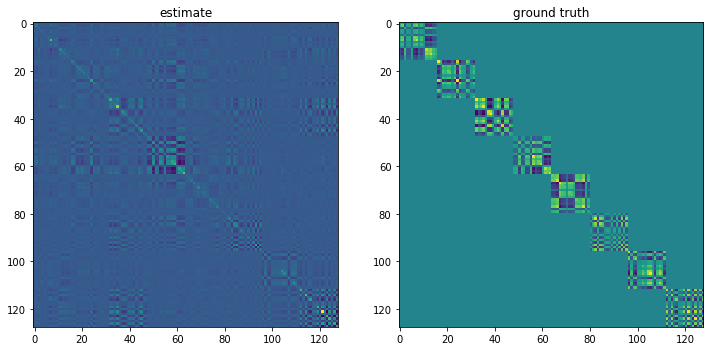

In [101]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].imshow(corex_cov)
ax[0].set_title('estimate')
ax[1].imshow(ground_truth)
ax[1].set_title('ground truth');

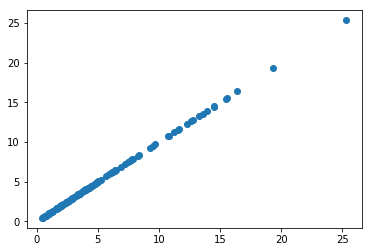

In [104]:
corex_stds=corex_cov.diagonal()  
train_stds=np.var(train_data, axis=0)
plt.scatter(corex_stds, train_stds)

### W matrice

In [105]:
W = corex.ws
print W.shape

(8, 128)


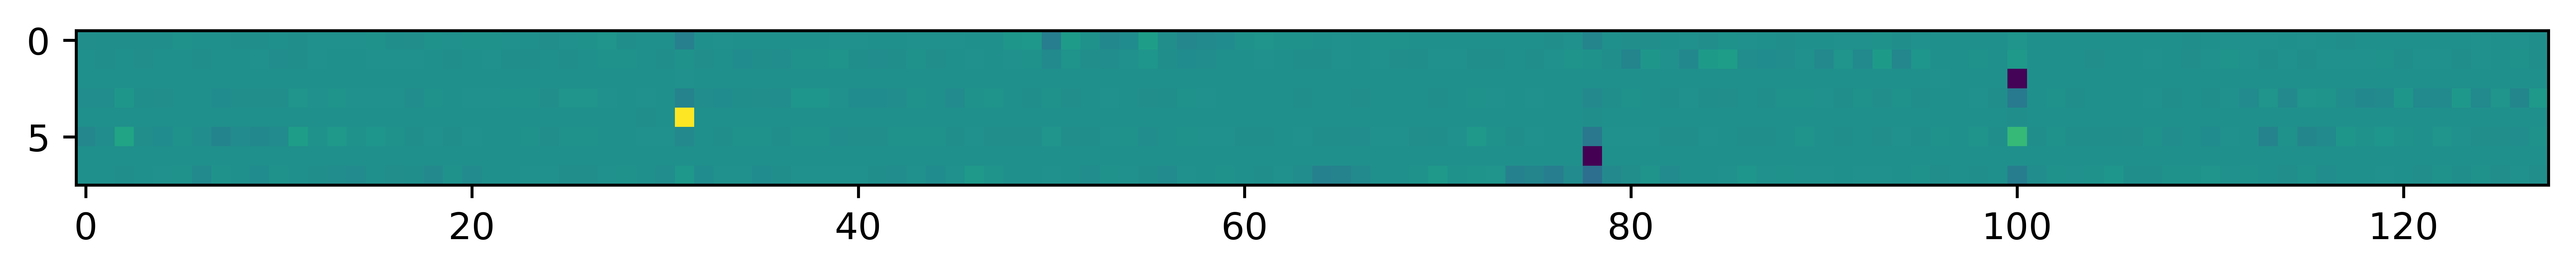

In [106]:
plt.figure(figsize=(12, 6), dpi=800)
plt.imshow(W);

### distibution of Z

In [107]:
Z = np.dot(data, W.T)
print Z.shape

(108, 8)


In [108]:
print np.var(Z, axis=0)

[ 3.758  5.066  1.743  5.539  6.427  4.609  3.589  4.888]


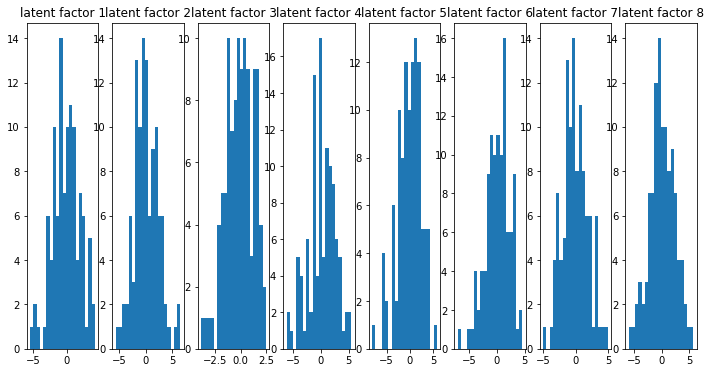

In [109]:
fig, ax = plt.subplots(nrows=1, ncols=m, figsize=(12, 6))
for i in range(m):
    ax[i].hist(Z[:, i], bins=20)
    ax[i].set_title('latent factor {}'.format(i+1))

# test theano implementation of linear corex

In [110]:
from theano_linear_corex_L1 import Corex

In [111]:
best_nll = np.inf
best_th_corex = None
best_l1 = None
coefs = [0, 1e-3, 3e-3, 1e-2, 3e-2, 1e-1, 3e-1, 1.0, 3.0, 10.0]
nlls = []
for l1 in coefs:
    print "training with l1 = {}".format(l1)
    cur_th_corex = Corex(nv=nv,
                    n_hidden=m,
                    max_iter=1000,
                    l1=l1,
                    verbose=1)
    cur_th_corex.fit(train_data)
    cur_th_corex_cov = cur_th_corex.get_covariance()
    nll = calculate_nll_score(data=[test_data], covs=[cur_th_corex_cov])
    nlls.append(nll)
    print "l1 = {}, nll = {}".format(l1, nll)
    if nll < best_nll:
        best_nll = nll
        best_th_corex = cur_th_corex
        best_l1 = l1

print "best l1 = {}".format(best_l1)
th_corex = best_th_corex

training with l1 = 0
Linear CorEx with 8 latent factors
tc = 15.3393876322, obj = -56.781203469, eps = 0.6
tc = 17.0446768284, obj = -54.3860208203, eps = 0.6
tc = 18.780144054, obj = -67.0428008649, eps = 0.6
tc = 20.1110935883, obj = -65.4675628966, eps = 0.6
tc = 21.1384188005, obj = -73.4767995666, eps = 0.6
tc = 22.4011467819, obj = -70.214064283, eps = 0.6
tc = 23.5742571568, obj = -78.188991872, eps = 0.6
tc = 24.6171606688, obj = -64.4195457572, eps = 0.6
tc = 26.0014926599, obj = -72.7635435009, eps = 0.6
tc = 27.2228901149, obj = -64.017622287, eps = 0.6
tc = 27.9889177518, obj = -67.6598978149, eps = 0.6
tc = 28.6619224276, obj = -81.8166911043, eps = 0.6
tc = 29.5265687177, obj = -81.2548016322, eps = 0.6
tc = 30.0885820965, obj = -71.6033087314, eps = 0.6
tc = 31.0153436184, obj = -70.6274750827, eps = 0.6
tc = 31.9722756308, obj = -64.5494771018, eps = 0.6
tc = 32.6291576895, obj = -74.950477727, eps = 0.6
tc = 33.2798588366, obj = -75.1638084544, eps = 0.6
tc = 33.844638

tc = 106.329224337, obj = -125.016787021, eps = 0.216
tc = 106.325876468, obj = -122.440090276, eps = 0.216
tc = 106.418658531, obj = -120.804796319, eps = 0.216
tc = 106.596812573, obj = -123.961607495, eps = 0.216
tc = 106.588682997, obj = -119.223338079, eps = 0.216
tc = 106.6644018, obj = -126.33891328, eps = 0.216
tc = 106.745925878, obj = -120.376978734, eps = 0.216
tc = 106.835915743, obj = -116.469829566, eps = 0.216
tc = 106.973550556, obj = -122.048225099, eps = 0.216
tc = 107.084736114, obj = -121.017213732, eps = 0.216
tc = 107.173899322, obj = -120.44655997, eps = 0.216
tc = 107.21649141, obj = -122.000257443, eps = 0.216
tc = 107.157436161, obj = -120.58999941, eps = 0.216
tc = 107.199037737, obj = -115.54596256, eps = 0.216
tc = 107.366970109, obj = -121.723066961, eps = 0.216
tc = 107.3180266, obj = -119.463181793, eps = 0.216
tc = 107.50626188, obj = -124.542925197, eps = 0.216
tc = 107.564900468, obj = -124.804623108, eps = 0.216
tc = 107.583809835, obj = -121.9063647

tc = 126.59171776, obj = -131.496260447, eps = 0.07776
tc = 126.645511161, obj = -129.347990833, eps = 0.07776
tc = 126.653514622, obj = -131.131349066, eps = 0.07776
tc = 126.705313389, obj = -129.167355246, eps = 0.07776
tc = 126.732052918, obj = -130.120401364, eps = 0.07776
tc = 126.802601425, obj = -131.539762931, eps = 0.07776
tc = 126.86402187, obj = -128.010789061, eps = 0.07776
tc = 126.914541744, obj = -131.5003448, eps = 0.07776
tc = 126.957958479, obj = -131.583022951, eps = 0.07776
tc = 126.979114968, obj = -132.291271276, eps = 0.07776
tc = 126.963478507, obj = -128.173752049, eps = 0.07776
tc = 127.047792838, obj = -133.253226271, eps = 0.07776
tc = 127.043113288, obj = -131.284253727, eps = 0.07776
tc = 127.107404707, obj = -129.609274907, eps = 0.07776
tc = 128.895445346, obj = -131.478800742, eps = 0.046656
tc = 128.975001067, obj = -133.10267287, eps = 0.046656
tc = 129.006305259, obj = -131.602426156, eps = 0.046656
tc = 128.984063346, obj = -131.074968574, eps = 0.

tc = 36.4766322621, obj = -71.0943706092, eps = 0.6
tc = 36.9076484345, obj = -81.1861817897, eps = 0.6
tc = 37.3086157953, obj = -77.0009654763, eps = 0.6
tc = 37.7608028163, obj = -75.5002116773, eps = 0.6
tc = 37.9835445105, obj = -80.105214938, eps = 0.6
tc = 38.1944412068, obj = -77.2323842874, eps = 0.6
tc = 38.5462714389, obj = -80.8217124589, eps = 0.6
tc = 38.8191273319, obj = -78.3493095082, eps = 0.6
tc = 38.7445192785, obj = -82.3037127112, eps = 0.6
tc = 38.9148081695, obj = -74.4089633686, eps = 0.6
tc = 39.2767966566, obj = -78.0617122074, eps = 0.6
tc = 39.4484681458, obj = -77.5280412891, eps = 0.6
tc = 39.8471721548, obj = -80.5647208042, eps = 0.6
tc = 40.127067842, obj = -75.6612982752, eps = 0.6
tc = 40.3832065123, obj = -75.9252851585, eps = 0.6
tc = 40.6648059625, obj = -74.0437456304, eps = 0.6
tc = 40.9193193174, obj = -86.1762627296, eps = 0.6
tc = 41.0825417692, obj = -83.7597122687, eps = 0.6
tc = 41.0219392142, obj = -84.1614050726, eps = 0.6
tc = 41.267284

tc = 109.971699256, obj = -129.141862035, eps = 0.216
tc = 110.017467331, obj = -124.892302818, eps = 0.216
tc = 109.90233491, obj = -120.90032996, eps = 0.216
tc = 109.993909273, obj = -123.488686807, eps = 0.216
tc = 110.077381503, obj = -126.636493012, eps = 0.216
tc = 110.128766091, obj = -122.563382228, eps = 0.216
tc = 110.213481207, obj = -124.062399249, eps = 0.216
tc = 110.251351765, obj = -119.793896455, eps = 0.216
tc = 110.176118269, obj = -121.117724113, eps = 0.216
tc = 110.178036298, obj = -122.16250647, eps = 0.216
tc = 110.422639381, obj = -128.136247927, eps = 0.216
tc = 110.425400624, obj = -126.163705285, eps = 0.216
tc = 110.352448472, obj = -123.172551235, eps = 0.216
tc = 110.544217407, obj = -127.938363249, eps = 0.216
tc = 110.481094716, obj = -125.235724066, eps = 0.216
tc = 110.575166258, obj = -126.826461247, eps = 0.216
tc = 121.498985283, obj = -129.400301134, eps = 0.1296
tc = 121.572550175, obj = -131.282223982, eps = 0.1296
tc = 121.731436994, obj = -13

tc = 130.810224188, obj = -133.173553948, eps = 0.046656
tc = 130.838447978, obj = -131.873552252, eps = 0.046656
tc = 130.82625297, obj = -133.121888128, eps = 0.046656
tc = 130.730770962, obj = -132.875197061, eps = 0.046656
tc = 130.824184025, obj = -132.926474064, eps = 0.046656
tc = 130.74487028, obj = -135.170829673, eps = 0.046656
tc = 130.832485164, obj = -134.612900256, eps = 0.046656
tc = 130.793975277, obj = -133.858373859, eps = 0.046656
tc = 130.871641434, obj = -133.617495531, eps = 0.046656
tc = 130.815829908, obj = -134.283326419, eps = 0.046656
tc = 130.878391057, obj = -133.997114201, eps = 0.046656
tc = 130.882871572, obj = -135.54248519, eps = 0.046656
tc = 130.918653, obj = -132.583587259, eps = 0.046656
tc = 130.904813908, obj = -132.626739762, eps = 0.046656
tc = 130.887365352, obj = -133.045147879, eps = 0.046656
tc = 130.881066127, obj = -134.002768922, eps = 0.046656
tc = 130.769297513, obj = -132.619853591, eps = 0.046656
tc = 130.9102747, obj = -130.33539637

tc = 36.5885059248, obj = -83.4714561547, eps = 0.6
tc = 36.9255231765, obj = -72.1511885817, eps = 0.6
tc = 36.7949120963, obj = -81.0691342765, eps = 0.6
tc = 37.3831278905, obj = -77.7235994093, eps = 0.6
tc = 37.4850026885, obj = -71.7548677467, eps = 0.6
tc = 37.7483178144, obj = -83.9114950273, eps = 0.6
tc = 37.9693884482, obj = -82.5285982536, eps = 0.6
tc = 38.229832669, obj = -68.3465275642, eps = 0.6
tc = 38.6431888068, obj = -79.8598639561, eps = 0.6
tc = 38.8324352616, obj = -83.1083454177, eps = 0.6
tc = 38.7881221263, obj = -76.282889173, eps = 0.6
tc = 38.8466987233, obj = -65.631646126, eps = 0.6
tc = 39.5442910013, obj = -77.0142447378, eps = 0.6
tc = 39.7961683686, obj = -82.4607831582, eps = 0.6
tc = 39.7726549145, obj = -86.0908019632, eps = 0.6
tc = 39.9241391472, obj = -79.85555322, eps = 0.6
tc = 40.2917932134, obj = -77.5909803674, eps = 0.6
tc = 40.4065194031, obj = -77.569699773, eps = 0.6
tc = 40.5300268839, obj = -94.2981648212, eps = 0.6
tc = 40.9190401202

tc = 110.960580567, obj = -123.316716221, eps = 0.216
tc = 110.928035842, obj = -127.905296655, eps = 0.216
tc = 111.083107814, obj = -125.903730334, eps = 0.216
tc = 111.049051267, obj = -129.958735382, eps = 0.216
tc = 111.10656413, obj = -123.38527219, eps = 0.216
tc = 111.173180537, obj = -124.695210295, eps = 0.216
tc = 111.154105213, obj = -126.771762225, eps = 0.216
tc = 111.203263316, obj = -129.796792369, eps = 0.216
tc = 111.123169408, obj = -124.099186357, eps = 0.216
tc = 111.135500507, obj = -128.356520107, eps = 0.216
tc = 111.133639999, obj = -124.461970089, eps = 0.216
tc = 111.062583068, obj = -130.287689743, eps = 0.216
tc = 111.218714585, obj = -125.085298901, eps = 0.216
tc = 111.330915482, obj = -119.743800001, eps = 0.216
tc = 111.268202778, obj = -120.88975589, eps = 0.216
tc = 111.309598248, obj = -126.272735895, eps = 0.216
tc = 111.304851579, obj = -120.23290588, eps = 0.216
tc = 122.484133252, obj = -134.428759964, eps = 0.1296
tc = 122.656806265, obj = -134.

tc = 130.837176823, obj = -134.256236409, eps = 0.046656
tc = 130.533974552, obj = -130.150091086, eps = 0.046656
tc = 130.722163388, obj = -132.209683241, eps = 0.046656
tc = 130.809366207, obj = -134.802808463, eps = 0.046656
tc = 130.753658042, obj = -132.893608515, eps = 0.046656
tc = 130.824138583, obj = -133.467501673, eps = 0.046656
tc = 130.796688037, obj = -135.380660269, eps = 0.046656
tc = 130.781263862, obj = -131.794282575, eps = 0.046656
tc = 130.782895552, obj = -134.402528721, eps = 0.046656
tc = 130.850829314, obj = -132.57946484, eps = 0.046656
tc = 130.839065441, obj = -131.457763134, eps = 0.046656
tc = 130.818673929, obj = -134.01699957, eps = 0.046656
tc = 130.857356021, obj = -132.789899838, eps = 0.046656
tc = 130.815528611, obj = -133.357504263, eps = 0.046656
tc = 130.863559881, obj = -134.280576962, eps = 0.046656
tc = 130.796438239, obj = -133.616019583, eps = 0.046656
tc = 130.741355513, obj = -131.776574159, eps = 0.046656
tc = 130.820123867, obj = -130.90

tc = 39.4683827335, obj = -83.0776155166, eps = 0.6
tc = 39.4543652707, obj = -80.1905926263, eps = 0.6
tc = 39.8520060891, obj = -79.4164723734, eps = 0.6
tc = 40.1800692551, obj = -73.7890751824, eps = 0.6
tc = 40.3463617033, obj = -80.9495919994, eps = 0.6
tc = 40.4106669034, obj = -81.6143675532, eps = 0.6
tc = 40.7251795986, obj = -86.6859054481, eps = 0.6
tc = 41.0472651888, obj = -82.3675255183, eps = 0.6
tc = 41.1351417878, obj = -84.8705740299, eps = 0.6
tc = 41.3085777123, obj = -80.0248608057, eps = 0.6
tc = 41.412123016, obj = -77.6757677508, eps = 0.6
tc = 41.580591148, obj = -94.3973265975, eps = 0.6
tc = 41.7477450512, obj = -85.4830549835, eps = 0.6
tc = 41.7627454401, obj = -86.9536125907, eps = 0.6
tc = 42.1903438728, obj = -84.3157006751, eps = 0.6
tc = 42.4801965922, obj = -81.5829588328, eps = 0.6
tc = 42.4961795906, obj = -81.1441397607, eps = 0.6
tc = 42.6397422629, obj = -83.1296947199, eps = 0.6
tc = 42.7480301956, obj = -78.2772303675, eps = 0.6
tc = 42.853119

tc = 108.125135325, obj = -122.502708322, eps = 0.216
tc = 108.192244735, obj = -117.012758331, eps = 0.216
tc = 108.296871431, obj = -121.299906523, eps = 0.216
tc = 108.306031575, obj = -118.339476933, eps = 0.216
tc = 108.351551964, obj = -122.757373896, eps = 0.216
tc = 108.483371746, obj = -121.711125371, eps = 0.216
tc = 108.523210851, obj = -123.776839588, eps = 0.216
tc = 108.593031633, obj = -126.061308521, eps = 0.216
tc = 108.634928149, obj = -120.84080448, eps = 0.216
tc = 108.632990275, obj = -123.061386256, eps = 0.216
tc = 108.64195785, obj = -121.877634964, eps = 0.216
tc = 108.711836001, obj = -120.944027103, eps = 0.216
tc = 108.747601521, obj = -121.92488192, eps = 0.216
tc = 108.816261512, obj = -122.416838666, eps = 0.216
tc = 108.875497595, obj = -122.650072241, eps = 0.216
tc = 108.903858586, obj = -121.176225936, eps = 0.216
tc = 119.286288298, obj = -125.489710629, eps = 0.1296
tc = 119.561214505, obj = -124.581116101, eps = 0.1296
tc = 119.722647241, obj = -12

tc = 129.455266868, obj = -131.048727732, eps = 0.046656
tc = 129.292273697, obj = -130.678445566, eps = 0.046656
tc = 129.473683075, obj = -133.151250149, eps = 0.046656
tc = 129.498870845, obj = -131.864521462, eps = 0.046656
tc = 129.460797471, obj = -130.894199184, eps = 0.046656
tc = 129.455032947, obj = -131.633840868, eps = 0.046656
tc = 129.553040227, obj = -129.883683528, eps = 0.046656
tc = 129.566212586, obj = -130.358208489, eps = 0.046656
tc = 129.51509297, obj = -130.977678649, eps = 0.046656
tc = 129.567895588, obj = -130.737217774, eps = 0.046656
tc = 129.486164147, obj = -131.196743529, eps = 0.046656
tc = 129.510973853, obj = -129.246043455, eps = 0.046656
tc = 129.56270683, obj = -132.687029751, eps = 0.046656
tc = 129.445591593, obj = -130.157116556, eps = 0.046656
tc = 129.567477898, obj = -130.713348981, eps = 0.046656
tc = 129.588597081, obj = -131.154655727, eps = 0.046656
tc = 129.549434153, obj = -130.805964703, eps = 0.046656
tc = 129.435127098, obj = -131.44

tc = 38.0743357079, obj = -79.1335796357, eps = 0.6
tc = 38.4899510141, obj = -74.2771752914, eps = 0.6
tc = 38.7399735497, obj = -63.9123847437, eps = 0.6
tc = 39.230933826, obj = -73.3581143429, eps = 0.6
tc = 39.1968315177, obj = -85.1070772807, eps = 0.6
tc = 39.2834301639, obj = -72.4705627375, eps = 0.6
tc = 39.7200335999, obj = -79.7143218855, eps = 0.6
tc = 40.2206860858, obj = -76.6585653959, eps = 0.6
tc = 40.5722734588, obj = -87.1802878661, eps = 0.6
tc = 40.617331242, obj = -85.6709313293, eps = 0.6
tc = 40.7972209812, obj = -77.090100827, eps = 0.6
tc = 41.2855810248, obj = -75.1643816452, eps = 0.6
tc = 41.5318359604, obj = -80.8662602154, eps = 0.6
tc = 41.4695361191, obj = -81.6997050438, eps = 0.6
tc = 41.7557217272, obj = -88.7868794244, eps = 0.6
tc = 41.8894691683, obj = -84.3943644391, eps = 0.6
tc = 42.1868876365, obj = -70.9969171274, eps = 0.6
tc = 42.408856516, obj = -86.2326169253, eps = 0.6
tc = 42.5122157254, obj = -82.3102304597, eps = 0.6
tc = 42.74941853

tc = 109.850463885, obj = -121.203635585, eps = 0.216
tc = 109.970883716, obj = -121.185751726, eps = 0.216
tc = 110.028298134, obj = -120.929033769, eps = 0.216
tc = 110.030607537, obj = -120.716752818, eps = 0.216
tc = 110.018208488, obj = -125.22880381, eps = 0.216
tc = 110.199753733, obj = -117.812163004, eps = 0.216
tc = 110.097147815, obj = -126.711521966, eps = 0.216
tc = 110.051924632, obj = -120.152852143, eps = 0.216
tc = 110.223035801, obj = -117.514014718, eps = 0.216
tc = 110.253960402, obj = -123.62630669, eps = 0.216
tc = 109.89845187, obj = -117.545526686, eps = 0.216
tc = 110.051594676, obj = -114.030303879, eps = 0.216
tc = 109.945078918, obj = -121.541896474, eps = 0.216
tc = 110.21451288, obj = -118.409324145, eps = 0.216
tc = 110.297235148, obj = -128.809518026, eps = 0.216
tc = 110.070647628, obj = -121.605174862, eps = 0.216
tc = 110.358222356, obj = -126.349334861, eps = 0.216
tc = 121.035833616, obj = -123.808109287, eps = 0.1296
tc = 121.216243643, obj = -124.

tc = 129.089784611, obj = -127.363315473, eps = 0.046656
tc = 129.097067476, obj = -131.260037407, eps = 0.046656
tc = 129.10625117, obj = -128.772077438, eps = 0.046656
tc = 129.060877554, obj = -129.091116591, eps = 0.046656
tc = 129.056842477, obj = -131.823582712, eps = 0.046656
tc = 129.096713025, obj = -129.262275486, eps = 0.046656
tc = 129.145982438, obj = -131.326677687, eps = 0.046656
tc = 129.024351936, obj = -130.958494705, eps = 0.046656
tc = 129.072517062, obj = -129.402293221, eps = 0.046656
tc = 129.117355621, obj = -130.331617013, eps = 0.046656
tc = 129.135893482, obj = -130.980852367, eps = 0.046656
tc = 129.030452578, obj = -130.989885408, eps = 0.046656
tc = 129.171221139, obj = -130.584486907, eps = 0.046656
tc = 129.156937511, obj = -128.845724192, eps = 0.046656
tc = 129.208241053, obj = -128.515372221, eps = 0.046656
tc = 129.226044824, obj = -128.016421811, eps = 0.046656
tc = 129.148020962, obj = -130.251780239, eps = 0.046656
tc = 129.18639982, obj = -127.89

tc = 38.7770950224, obj = -73.7477136285, eps = 0.6
tc = 39.0587732609, obj = -76.5911361163, eps = 0.6
tc = 39.5939779647, obj = -67.8463791628, eps = 0.6
tc = 39.9154970444, obj = -80.4625922099, eps = 0.6
tc = 40.1385430397, obj = -79.6857452806, eps = 0.6
tc = 40.2516899411, obj = -70.5854262704, eps = 0.6
tc = 40.6822331453, obj = -79.7102149378, eps = 0.6
tc = 40.8710478338, obj = -65.3112580349, eps = 0.6
tc = 41.0089763299, obj = -85.3907960282, eps = 0.6
tc = 41.2706680875, obj = -82.0828847087, eps = 0.6
tc = 41.531180733, obj = -67.5295673453, eps = 0.6
tc = 41.7420262086, obj = -75.4312895669, eps = 0.6
tc = 41.8338625088, obj = -64.1016774886, eps = 0.6
tc = 42.0050813766, obj = -89.8126007993, eps = 0.6
tc = 42.2070642258, obj = -79.7536366428, eps = 0.6
tc = 42.2248322005, obj = -81.1426293562, eps = 0.6
tc = 42.3909681804, obj = -75.9937863376, eps = 0.6
tc = 42.7763496299, obj = -74.7009025217, eps = 0.6
tc = 42.9458599063, obj = -74.5169417373, eps = 0.6
tc = 42.84879

tc = 106.615973517, obj = -115.578295632, eps = 0.216
tc = 106.657300107, obj = -119.240826788, eps = 0.216
tc = 106.685938992, obj = -115.255440959, eps = 0.216
tc = 106.613595156, obj = -113.193031175, eps = 0.216
tc = 106.654920997, obj = -115.425458777, eps = 0.216
tc = 106.676251902, obj = -108.943565878, eps = 0.216
tc = 106.566847523, obj = -116.591227386, eps = 0.216
tc = 106.821975218, obj = -112.170856996, eps = 0.216
tc = 106.766571824, obj = -119.064587444, eps = 0.216
tc = 106.739570129, obj = -111.356483806, eps = 0.216
tc = 106.679510831, obj = -114.600902395, eps = 0.216
tc = 106.728228034, obj = -113.517445057, eps = 0.216
tc = 106.839838678, obj = -113.484342738, eps = 0.216
tc = 106.802692359, obj = -113.521496101, eps = 0.216
tc = 106.85595143, obj = -110.1559502, eps = 0.216
tc = 116.324161318, obj = -118.22598606, eps = 0.1296
tc = 116.543978498, obj = -115.185172662, eps = 0.1296
tc = 116.396026072, obj = -114.537542348, eps = 0.1296
tc = 116.717356754, obj = -11

tc = 125.233710375, obj = -121.675077075, eps = 0.046656
tc = 125.160604703, obj = -119.368091847, eps = 0.046656
tc = 125.259295722, obj = -123.259533128, eps = 0.046656
tc = 125.389636034, obj = -122.340916106, eps = 0.046656
tc = 125.330763062, obj = -120.693708533, eps = 0.046656
tc = 125.377966434, obj = -125.330096344, eps = 0.046656
tc = 125.477328059, obj = -127.714894114, eps = 0.046656
tc = 125.238805691, obj = -122.683192903, eps = 0.046656
tc = 125.163549998, obj = -122.531775494, eps = 0.046656
tc = 125.332997825, obj = -124.264824456, eps = 0.046656
tc = 125.52893, obj = -122.283462025, eps = 0.046656
tc = 125.464580288, obj = -127.828397302, eps = 0.046656
tc = 125.312896986, obj = -123.299095729, eps = 0.046656
tc = 125.405700109, obj = -122.682369313, eps = 0.046656
tc = 125.500157305, obj = -120.207911913, eps = 0.046656
tc = 125.452444797, obj = -123.653533705, eps = 0.046656
tc = 125.425016337, obj = -123.253180754, eps = 0.046656
tc = 125.465853663, obj = -117.4850

tc = 37.6318828915, obj = -67.5835486605, eps = 0.6
tc = 37.9737546556, obj = -56.2272547677, eps = 0.6
tc = 38.2787936375, obj = -67.3453446234, eps = 0.6
tc = 38.3509037346, obj = -50.4970189581, eps = 0.6
tc = 38.5882656317, obj = -60.8342367302, eps = 0.6
tc = 38.8136193779, obj = -72.0929857214, eps = 0.6
tc = 39.215683927, obj = -69.8439750439, eps = 0.6
tc = 39.400403551, obj = -63.7417208423, eps = 0.6
tc = 39.6220966675, obj = -66.260669142, eps = 0.6
tc = 39.6113081319, obj = -69.6122005823, eps = 0.6
tc = 39.5377369719, obj = -69.4116859536, eps = 0.6
tc = 39.7666544885, obj = -59.9003747968, eps = 0.6
tc = 40.0953950755, obj = -66.2668138754, eps = 0.6
tc = 40.3629072742, obj = -60.9121714901, eps = 0.6
tc = 40.6283113697, obj = -59.9709529694, eps = 0.6
tc = 40.7004783602, obj = -58.995965833, eps = 0.6
tc = 40.9291997792, obj = -71.5077764039, eps = 0.6
tc = 41.0352901982, obj = -78.9345584724, eps = 0.6
tc = 41.1057092063, obj = -77.2307769448, eps = 0.6
tc = 41.19911989

tc = 103.446657735, obj = -107.138516239, eps = 0.216
tc = 103.517330056, obj = -106.393867676, eps = 0.216
tc = 103.55915377, obj = -109.00937121, eps = 0.216
tc = 103.806244511, obj = -98.0768539265, eps = 0.216
tc = 103.628111645, obj = -107.279731329, eps = 0.216
tc = 103.767758039, obj = -106.282176874, eps = 0.216
tc = 103.830590853, obj = -103.215777618, eps = 0.216
tc = 103.780613219, obj = -103.960895426, eps = 0.216
tc = 103.85161676, obj = -105.06957443, eps = 0.216
tc = 103.67116848, obj = -108.488007997, eps = 0.216
tc = 103.924886394, obj = -105.980276866, eps = 0.216
tc = 104.097106295, obj = -102.703110453, eps = 0.216
tc = 104.072344328, obj = -101.959266459, eps = 0.216
tc = 104.164639375, obj = -93.241698863, eps = 0.216
tc = 104.216474997, obj = -109.892350469, eps = 0.216
tc = 113.502026204, obj = -107.524554382, eps = 0.1296
tc = 113.513170316, obj = -106.211055918, eps = 0.1296
tc = 113.854518768, obj = -104.522806019, eps = 0.1296
tc = 113.900193022, obj = -110.

tc = 122.148841299, obj = -119.43234758, eps = 0.046656
tc = 122.308571083, obj = -112.589917644, eps = 0.046656
tc = 122.463769356, obj = -115.809157357, eps = 0.046656
tc = 122.534742902, obj = -111.629325409, eps = 0.046656
tc = 122.403516214, obj = -111.196733599, eps = 0.046656
tc = 122.415538816, obj = -114.010324097, eps = 0.046656
tc = 122.459711932, obj = -115.481949116, eps = 0.046656
tc = 122.384475509, obj = -119.3431405, eps = 0.046656
tc = 122.293952472, obj = -118.251150346, eps = 0.046656
tc = 122.612812209, obj = -116.86478313, eps = 0.046656
tc = 122.407355581, obj = -112.702656103, eps = 0.046656
tc = 122.595587407, obj = -118.968645435, eps = 0.046656
tc = 122.68097141, obj = -115.082625012, eps = 0.046656
tc = 122.632914686, obj = -109.819854143, eps = 0.046656
tc = 122.624227169, obj = -110.193435356, eps = 0.046656
tc = 122.562107276, obj = -118.313636155, eps = 0.046656
tc = 122.494234685, obj = -120.579761826, eps = 0.046656
tc = 122.557002736, obj = -118.59321

tc = 29.5088263542, obj = -64.3673534073, eps = 0.6
tc = 29.6056145884, obj = -40.3446870537, eps = 0.6
tc = 29.5748483145, obj = -32.7464341794, eps = 0.6
tc = 29.3142633041, obj = -54.5081192866, eps = 0.6
tc = 29.5755210957, obj = -28.0817320844, eps = 0.6
tc = 29.4336471997, obj = -38.6538791583, eps = 0.6
tc = 29.3380672184, obj = -54.977408313, eps = 0.6
tc = 29.2133156397, obj = -52.9319682562, eps = 0.6
tc = 29.0647862588, obj = -55.9768126483, eps = 0.6
tc = 29.330847266, obj = -60.8152109729, eps = 0.6
tc = 28.7406526793, obj = -44.847891168, eps = 0.6
tc = 29.1078974476, obj = -57.7937385631, eps = 0.6
tc = 29.5644290964, obj = -42.9831813212, eps = 0.6
tc = 29.2348607383, obj = -53.6499329275, eps = 0.6
tc = 29.21648486, obj = -58.3544667456, eps = 0.6
tc = 29.3479203701, obj = -46.1088669011, eps = 0.6
tc = 29.5227026993, obj = -57.9449358893, eps = 0.6
tc = 29.3213029881, obj = -35.0221365984, eps = 0.6
tc = 29.4853089635, obj = -57.1181536691, eps = 0.6
tc = 29.719172085

tc = 78.5100695063, obj = -90.1361355253, eps = 0.216
tc = 78.570213502, obj = -86.2005336237, eps = 0.216
tc = 79.0213561611, obj = -99.9402252833, eps = 0.216
tc = 78.8053223725, obj = -85.0443085723, eps = 0.216
tc = 78.454116922, obj = -84.7888785433, eps = 0.216
tc = 78.3032627415, obj = -86.3568890921, eps = 0.216
tc = 78.5253069056, obj = -88.5631127995, eps = 0.216
tc = 78.1781424536, obj = -85.0780428793, eps = 0.216
tc = 79.1420673353, obj = -80.1742626215, eps = 0.216
tc = 79.3888799998, obj = -79.3578409104, eps = 0.216
tc = 79.3567450377, obj = -72.5390207715, eps = 0.216
tc = 79.8103020663, obj = -92.0382345419, eps = 0.216
tc = 79.3713950719, obj = -88.1826505123, eps = 0.216
tc = 79.7631697774, obj = -80.2378123206, eps = 0.216
tc = 79.740651157, obj = -83.2551854985, eps = 0.216
tc = 79.1717606907, obj = -68.7936181617, eps = 0.216
tc = 79.2894172596, obj = -80.6288771802, eps = 0.216
tc = 85.4074835555, obj = -80.0834330274, eps = 0.1296
tc = 85.90674441, obj = -72.69

tc = 92.5448027879, obj = -90.2913814953, eps = 0.046656
tc = 92.0678418276, obj = -89.5989287463, eps = 0.046656
tc = 92.5176914486, obj = -94.1096974821, eps = 0.046656
tc = 92.3428132856, obj = -91.4988410502, eps = 0.046656
tc = 92.185697698, obj = -91.450084954, eps = 0.046656
tc = 92.2528670183, obj = -91.0947610641, eps = 0.046656
tc = 92.4558410055, obj = -98.4751995605, eps = 0.046656
tc = 92.4473443174, obj = -88.8924516177, eps = 0.046656
tc = 92.7211029082, obj = -96.4983874651, eps = 0.046656
tc = 92.5857638504, obj = -106.943814701, eps = 0.046656
tc = 92.3342447027, obj = -87.2629421731, eps = 0.046656
tc = 92.4679931786, obj = -94.6916930615, eps = 0.046656
tc = 92.4802419579, obj = -89.8116370135, eps = 0.046656
tc = 92.4340205842, obj = -100.907690264, eps = 0.046656
tc = 92.4262555449, obj = -94.275609291, eps = 0.046656
tc = 91.9622387586, obj = -76.5548111302, eps = 0.046656
tc = 92.4930467044, obj = -93.9686559419, eps = 0.046656
tc = 93.0154155317, obj = -89.8313

tc = 4.34410570848, obj = -45.3546780138, eps = 0.6
tc = 4.45178541324, obj = -57.3562065964, eps = 0.6
tc = 4.60463133273, obj = -43.1754779793, eps = 0.6
tc = 3.8896629322, obj = -50.4731241746, eps = 0.6
tc = 2.83819910569, obj = -42.0845848806, eps = 0.6
tc = 2.23377499199, obj = -60.1310488005, eps = 0.6
tc = 2.07038287821, obj = -44.2392679032, eps = 0.6
tc = 2.20566033293, obj = -52.0965787612, eps = 0.6
tc = 2.29407722703, obj = -43.8562159125, eps = 0.6
tc = 1.93026841069, obj = -46.5781571328, eps = 0.6
tc = 1.51589279799, obj = -55.2640835569, eps = 0.6
tc = 1.34177686345, obj = -56.7136849554, eps = 0.6
tc = 0.692983813064, obj = -60.9707012801, eps = 0.6
tc = 0.494488628126, obj = -36.2604715396, eps = 0.6
tc = 0.520903138041, obj = -61.4208507003, eps = 0.6
tc = 1.32367943458, obj = -54.1488339621, eps = 0.6
tc = 1.74254804756, obj = -57.6652695943, eps = 0.6
tc = 1.88034043729, obj = -68.2327033476, eps = 0.6
tc = 0.844396170796, obj = -56.6314622251, eps = 0.6
tc = 0.51

tc = 39.8975980956, obj = -65.2738061811, eps = 0.216
tc = 39.9005520537, obj = -62.6762870169, eps = 0.216
tc = 39.4588661788, obj = -45.9807903857, eps = 0.216
tc = 38.6877690154, obj = -46.9660866412, eps = 0.216
tc = 38.7166725982, obj = -55.2575162377, eps = 0.216
tc = 38.9467639553, obj = -58.9742775142, eps = 0.216
tc = 39.233627533, obj = -63.1899525329, eps = 0.216
tc = 38.4052486239, obj = -64.0025250756, eps = 0.216
tc = 37.8750480403, obj = -71.2451612262, eps = 0.216
tc = 38.0321572506, obj = -69.7393550978, eps = 0.216
tc = 38.8782503182, obj = -60.5640878782, eps = 0.216
tc = 39.314774669, obj = -82.0874464207, eps = 0.216
tc = 39.9840465576, obj = -59.9528351337, eps = 0.216
tc = 40.0272783755, obj = -46.3472100814, eps = 0.216
tc = 39.9265050454, obj = -76.5015023202, eps = 0.216
tc = 40.2702983032, obj = -46.0372879974, eps = 0.216
tc = 40.2727255489, obj = -57.2004465393, eps = 0.216
tc = 42.8915073339, obj = -58.9533138644, eps = 0.1296
tc = 43.7188385412, obj = -59

tc = 46.4089433068, obj = -67.6555953147, eps = 0.046656
tc = 45.9488736697, obj = -58.2176319175, eps = 0.046656
tc = 46.8187875938, obj = -77.4912879166, eps = 0.046656
tc = 46.4865937463, obj = -70.1578665665, eps = 0.046656
tc = 46.4294394299, obj = -64.5698141947, eps = 0.046656
tc = 46.1769916188, obj = -52.706219391, eps = 0.046656
tc = 46.284285469, obj = -73.9569535125, eps = 0.046656
tc = 46.2665885334, obj = -70.4589008611, eps = 0.046656
tc = 46.3757054309, obj = -57.9535248864, eps = 0.046656
tc = 46.3742402058, obj = -60.2457139078, eps = 0.046656
tc = 46.7063379635, obj = -66.0909775929, eps = 0.046656
tc = 46.3625655648, obj = -74.8596467955, eps = 0.046656
tc = 46.2716956957, obj = -76.0113809396, eps = 0.046656
tc = 45.703633157, obj = -49.2413524212, eps = 0.046656
tc = 46.1715126702, obj = -58.5898244061, eps = 0.046656
tc = 46.4615101544, obj = -56.2996797128, eps = 0.046656
tc = 46.6624850483, obj = -56.4017549527, eps = 0.046656
tc = 46.0821033346, obj = -78.2961

tc = 0.0179098242976, obj = -57.1284453199, eps = 0.6
tc = 0.0123930341658, obj = -61.6949827583, eps = 0.6
tc = 0.0164336704609, obj = -65.2856341548, eps = 0.6
tc = 0.0158645488993, obj = -60.8947893649, eps = 0.6
tc = 0.0515889770965, obj = -40.955382897, eps = 0.6
tc = 0.0141797707324, obj = -49.3195123534, eps = 0.6
tc = 0.0223220138098, obj = -47.9159264308, eps = 0.6
tc = 0.0271018271504, obj = -78.8253098405, eps = 0.6
tc = 0.0159568038154, obj = -56.801865396, eps = 0.6
tc = 0.022290694592, obj = -60.1375819112, eps = 0.6
tc = 0.0054974749872, obj = -55.0657264402, eps = 0.6
tc = 0.0174016532197, obj = -70.6679155184, eps = 0.6
tc = 0.0115988575674, obj = -67.0237296312, eps = 0.6
tc = 0.0390248842119, obj = -59.7935945956, eps = 0.6
tc = 0.0116164818583, obj = -55.4045272547, eps = 0.6
tc = 0.0301319980717, obj = -53.4646201776, eps = 0.6
tc = 0.0132170684079, obj = -48.722089295, eps = 0.6
tc = 0.0191845953574, obj = -59.3636747981, eps = 0.6
tc = 0.0104052398908, obj = -68.

tc = 0.0655814300848, obj = -61.897393354, eps = 0.216
tc = 0.271769385042, obj = -49.0393880082, eps = 0.216
tc = 0.144670157294, obj = -33.0111975253, eps = 0.216
tc = 0.135381014172, obj = -46.0597453766, eps = 0.216
tc = 0.0640996227865, obj = -58.2101012529, eps = 0.216
tc = 0.134487199644, obj = -61.9275941374, eps = 0.216
tc = 0.158490161827, obj = -66.276881411, eps = 0.216
tc = 0.16366354029, obj = -68.1974249806, eps = 0.216
tc = 0.153942035174, obj = -65.8446273393, eps = 0.216
tc = 0.114061657224, obj = -62.8630018338, eps = 0.216
tc = 0.0943159873791, obj = -44.9475830682, eps = 0.216
tc = 0.052181552262, obj = -35.0946452362, eps = 0.216
tc = 0.158287967778, obj = -63.7347258974, eps = 0.216
tc = 0.139930595892, obj = -51.5038076637, eps = 0.216
tc = 0.316904445134, obj = -51.2065934968, eps = 0.216
tc = 0.401736921884, obj = -36.10299195, eps = 0.1296
tc = 0.990537959336, obj = -54.1969851173, eps = 0.1296
tc = 0.140660045386, obj = -38.0790350241, eps = 0.1296
tc = 0.23

tc = 1.19028860605, obj = -57.1381608397, eps = 0.046656
tc = 0.231317070911, obj = -26.4303511336, eps = 0.046656
tc = 0.20674797778, obj = -46.9312535928, eps = 0.046656
tc = 0.0645981018909, obj = -48.1277227353, eps = 0.046656
tc = 0.101536530649, obj = -49.3964759254, eps = 0.046656
tc = 0.240145686857, obj = -69.9324650202, eps = 0.046656
tc = 0.183792043552, obj = -51.4435244715, eps = 0.046656
tc = 0.16015483845, obj = -45.6697581125, eps = 0.046656
tc = 0.209026289553, obj = -38.9218048557, eps = 0.046656
tc = 0.0924402714898, obj = -48.381122036, eps = 0.046656
tc = 0.614628943213, obj = -56.2480112246, eps = 0.046656
tc = 0.15669471996, obj = -48.0422673011, eps = 0.046656
tc = 0.21609640579, obj = -75.5410310106, eps = 0.046656
tc = 0.0651748368855, obj = -49.2678040136, eps = 0.046656
tc = 0.189244962382, obj = -58.099808042, eps = 0.046656
tc = 0.135216897925, obj = -62.3644715076, eps = 0.046656
tc = 0.316224389178, obj = -45.7416631599, eps = 0.046656
tc = 0.11187309501

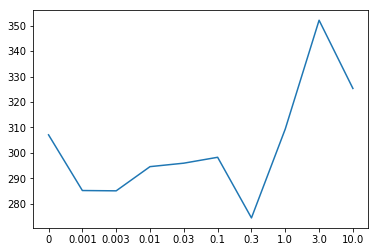

In [112]:
plt.plot(range(len(coefs)), nlls)
plt.xticks(range(len(coefs)), coefs);

### learned covariance

In [113]:
th_corex_cov = th_corex.get_covariance()

In [114]:
calculate_nll_score(data=[test_data], covs=[th_corex_cov])

274.41506917489909

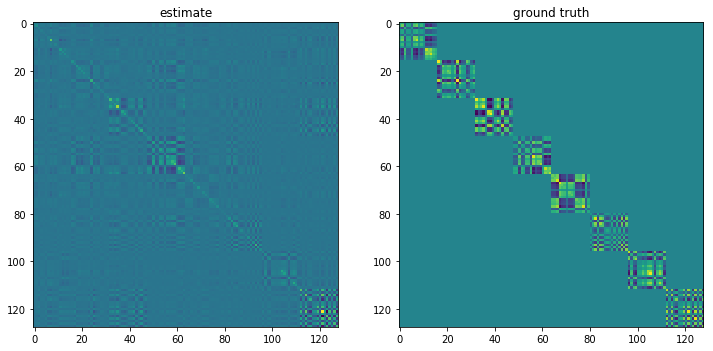

In [115]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].imshow(th_corex_cov)
ax[0].set_title('estimate')
ax[1].imshow(ground_truth)
ax[1].set_title('ground truth');

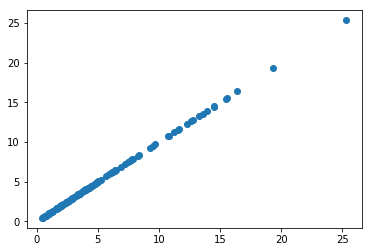

In [122]:
corex_stds=th_corex_cov.diagonal()  
train_stds=np.var(train_data, axis=0)
plt.scatter(corex_stds, train_stds)

### W matrice

In [117]:
W = th_corex.ws.get_value()
print W.shape

(8, 128)


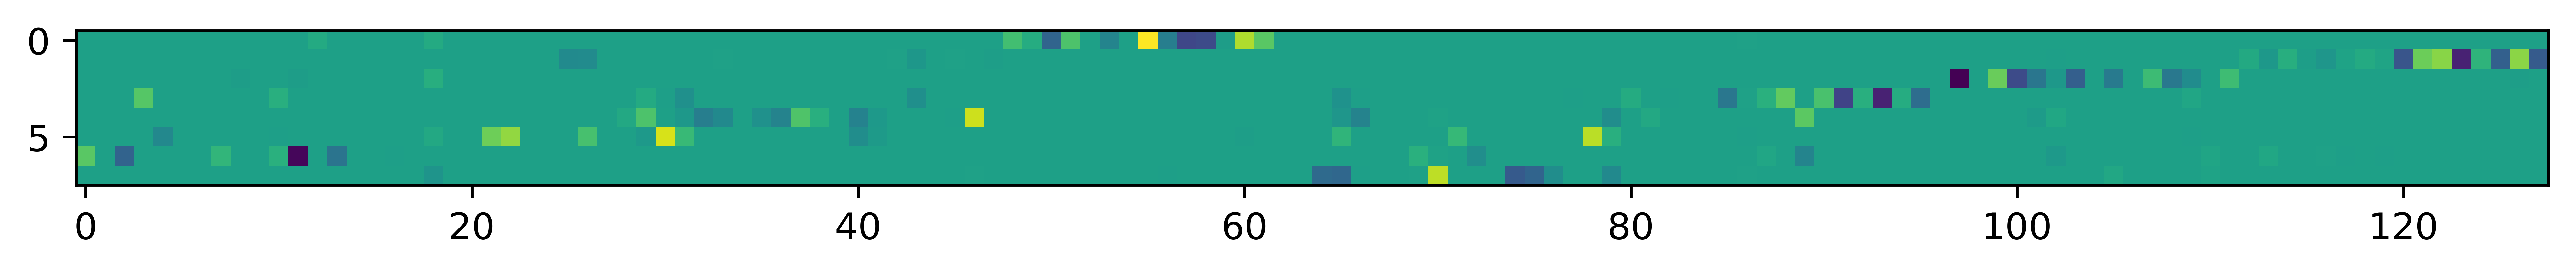

In [118]:
plt.figure(figsize=(12, 6), dpi=800)
plt.imshow(W);

### distibution of Z

In [119]:
Z = np.dot(data, W.T)
print Z.shape

(108, 8)


In [120]:
print np.var(Z, axis=0)

[ 179.399  186.492  129.952  114.329   60.686   31.443   69.885   79.493]


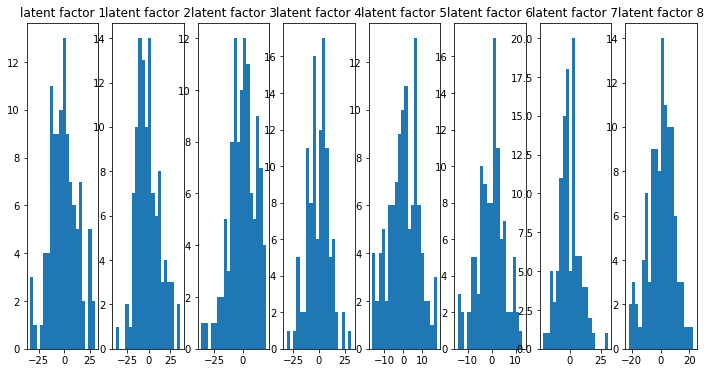

In [121]:
fig, ax = plt.subplots(nrows=1, ncols=m, figsize=(12, 6))
for i in range(m):
    ax[i].hist(Z[:, i], bins=20)
    ax[i].set_title('latent factor {}'.format(i+1))